In [1]:
# import popular libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
import yfinance as yf

# import daily stock data from the S&P 500
sp500 = yf.download('^GSPC', start='2010-01-01', end='2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [5]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2021-12-23,4703.959961,4740.740234,4703.959961,4725.790039,4725.790039,2194630000
2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2264120000
2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2217050000


In [6]:
# calculate daily returns
sp500['daily_return'] = sp500['Adj Close'].pct_change()

In [7]:
# calculate cumulative returns
sp500['cumulative_return'] = (1 + sp500['daily_return']).cumprod()

In [8]:
# describe the daily returns
sp500['daily_return'].describe()

count    3019.000000
mean        0.000536
std         0.010818
min        -0.119841
25%        -0.003477
50%         0.000709
75%         0.005399
max         0.093828
Name: daily_return, dtype: float64

In [9]:
# what day had the largest daily return?
sp500['daily_return'].idxmax()

Timestamp('2020-03-24 00:00:00')

In [11]:
# filter the data for 2020
sp500_2020 = sp500.loc['2020-01-01':'2020-12-31']
# when was the low for the stock market?
sp500_2020['Adj Close'].idxmin()

Timestamp('2020-03-23 00:00:00')

#### On CNBC the day after the Bottom
###### Many on Wall Street believe absent a clear sign that the coronavirus is contained, rallies like the 10% violent upswing in the Dow Tuesday will come and go. “We’re going to need to have to see the infections pass an inflection point,” said Vincent Reinhart, chief economist at BNY Asset Management. The market has received help from monetary policy and looks on its way to aid from the fiscal side, but market experts see no clear path forward without signs the coronavirus is passing. – Li, Cox

In [12]:
# measure the volatility of the stock market
sp500['daily_return'].std()

0.010818363793744285

In [14]:
# annualize the volatility
sp500['daily_return'].std() * np.sqrt(252)

0.17173620114523586

In [15]:
# annualize the returns
sp500['daily_return'].mean() * 252

0.1349809649739508

In [16]:
# divide the annual returns by the annual volatility
sp500['daily_return'].mean() * 252 / (sp500['daily_return'].std() * np.sqrt(252))

0.7859785186455739

In [ ]:
# google, what is a good sharpe ratio?
# https://www.investopedia.com/terms/s/sharperatio.asp

In [17]:
# let's get stock data since 1980
sp500 = yf.download('^GSPC', start='1980-01-01', end='2021-12-31')

[*********************100%***********************]  1 of 1 completed


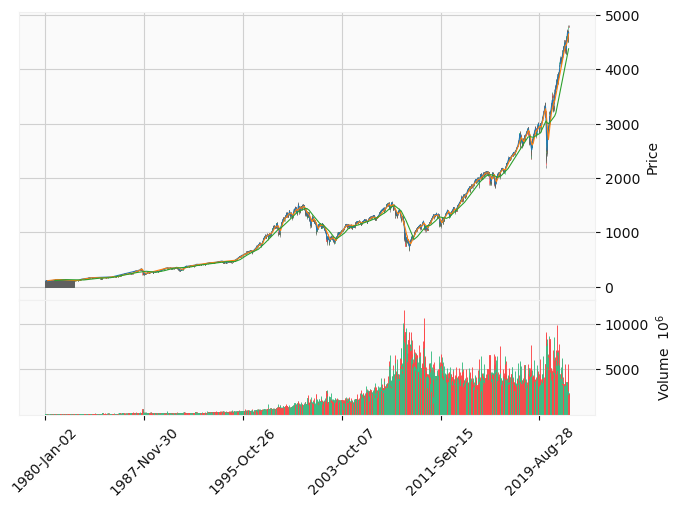

In [23]:
# add bolinger bands
sp500['20d_ma'] = sp500['Adj Close'].rolling(window=20).mean()
sp500['20d_std'] = sp500['Adj Close'].rolling(window=20).std()
sp500['upper_band'] = sp500['20d_ma'] + (sp500['20d_std'] * 2)
sp500['lower_band'] = sp500['20d_ma'] - (sp500['20d_std'] * 2)

# plot the data in a candlestick chart
import mplfinance as mpf
mpf.plot(sp500, type='candle', style='yahoo', mav=(20, 50, 200), volume=True)

In [24]:
# lets predict the stock market
# import the data
sp500 = yf.download('^GSPC', start='1980-01-01', end='2021-12-31')

# add bolinger bands
sp500['20d_ma'] = sp500['Adj Close'].rolling(window=20).mean()
sp500['20d_std'] = sp500['Adj Close'].rolling(window=20).std()
sp500['upper_band'] = sp500['20d_ma'] + (sp500['20d_std'] * 2)
sp500['lower_band'] = sp500['20d_ma'] - (sp500['20d_std'] * 2)

# add the target variable
sp500['target'] = np.where(sp500['Adj Close'].shift(-1) > sp500['Adj Close'], 1, 0)

# drop the na values
sp500.dropna(inplace=True)

# split the data into train and test
from sklearn.model_selection import train_test_split

X = sp500[['20d_ma', '20d_std', 'upper_band', 'lower_band']]
y = sp500['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# import the model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
rf = RandomForestClassifier()

# fit the model
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[*********************100%***********************]  1 of 1 completed
0.4955082742316785
[[438 544]
 [523 610]]
              precision    recall  f1-score   support

           0       0.46      0.45      0.45       982
           1       0.53      0.54      0.53      1133

    accuracy                           0.50      2115
   macro avg       0.49      0.49      0.49      2115
weighted avg       0.49      0.50      0.50      2115

